# Training Models


 Training model: LOGISTIC
Best parameters for logistic model: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.8802
Accuracy: 0.8722

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2500
           1       0.86      0.89      0.87      2500

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



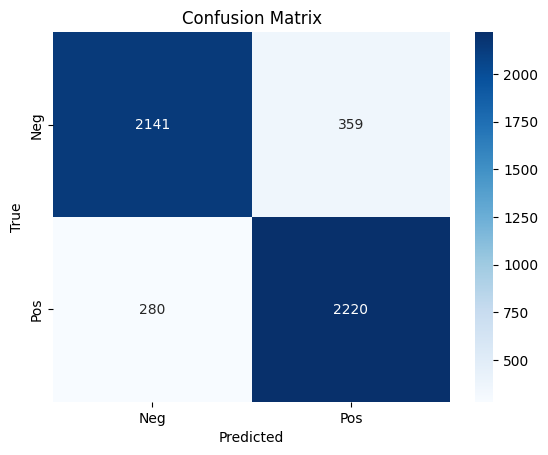


 Training model: NAIVE_BAYES
Best parameters for naive_bayes model: {'alpha': 0.5, 'fit_prior': True}
Best cross-validation score: 0.8588
Accuracy: 0.8466

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2500
           1       0.83      0.87      0.85      2500

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



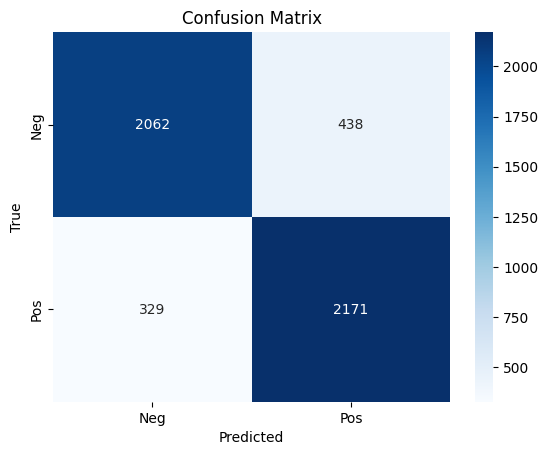


 Training model: SVM
Best parameters for svm model: {'C': 0.1, 'dual': True, 'loss': 'squared_hinge'}
Best cross-validation score: 0.8810
Accuracy: 0.8734

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      2500
           1       0.86      0.89      0.88      2500

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



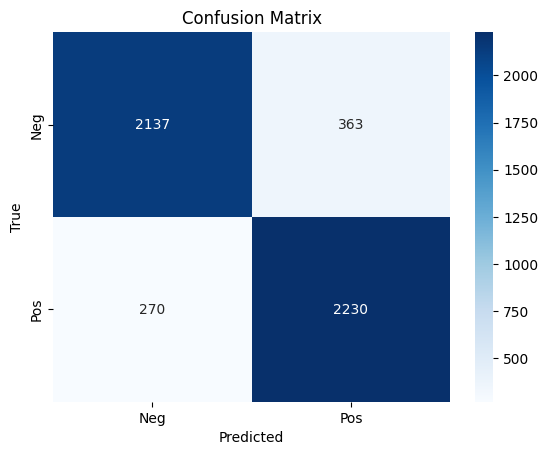


Best model: svm with accuracy: 0.8734


['../models/vectorizer.joblib']

In [1]:
import pandas as pd 
import os
import sys

sys.path.append(os.path.abspath('..'))

from app.model import vectorize_text, train_model, evaluate_model

import joblib

df = pd.read_csv('../data/preprocessed/imdb_reviews_train_clean.csv')


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, stratify=df['label'], random_state=42
)

X_train_vect, X_test_vect, vectorizer = vectorize_text(X_train, X_test)

best_accuracy = 0.0
best_model = None
best_model_name = None


for model_name in ['logistic', 'naive_bayes', 'svm']:
    print(f"\n Training model: {model_name.upper()}")
    model, best_parms = train_model(X_train_vect, y_train, model_type=model_name)
    acc = evaluate_model(model, X_test_vect, y_test)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = model_name
        
print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy:.4f}")
joblib.dump(best_model, '../models/best_model.joblib')
joblib.dump(vectorizer, '../models/vectorizer.joblib')